In [ ]:
! pip install shap

In [2]:
import xgboost
import shap

In [3]:
# 使用在 scikit-learn 庫提供的玩具糖尿病資料集上訓練的 XGBoost 模型
X, y = shap.datasets.diabetes()
bst = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

In [6]:
X # 442 rows × 10 columns

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [4]:
# explain the model's prediction using SHAP values
shap_values = shap.TreeExplainer(bst).shap_values(X)

type(shap_values)

numpy.ndarray

# A simple violin summary plot

小提琴摘要圖提供了每個特徵的 SHAP 值的分佈和變異性的緊湊表示。各個小提琴圖根據特定特徵對模型輸出的重要性（每個特徵的 SHAP 值的絕對值總和）進行堆疊。

整體小提琴摘要圖允許對特徵重要性進行比較。更寬的小提琴表示更高的密度和更頻繁的值，從而深入了解每個特徵對於模型輸出的相對重要性。

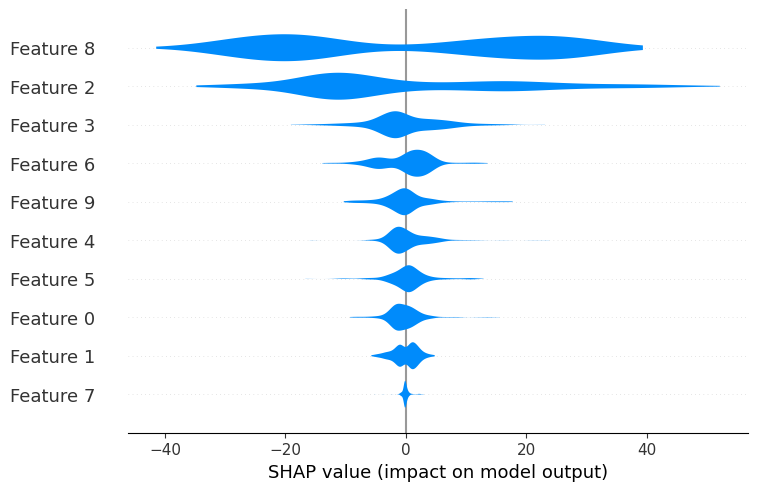

In [5]:
shap.plots.violin(shap_values)

小提琴摘要圖顯示的特徵數量可以使用 max_display 參數進行調整

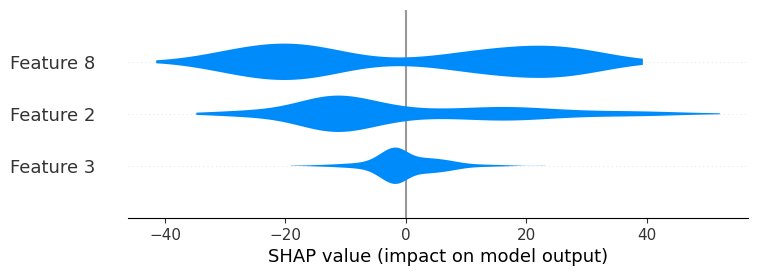

In [7]:
shap.plots.violin(shap_values, max_display=3)

以使用顏色參數進行變更

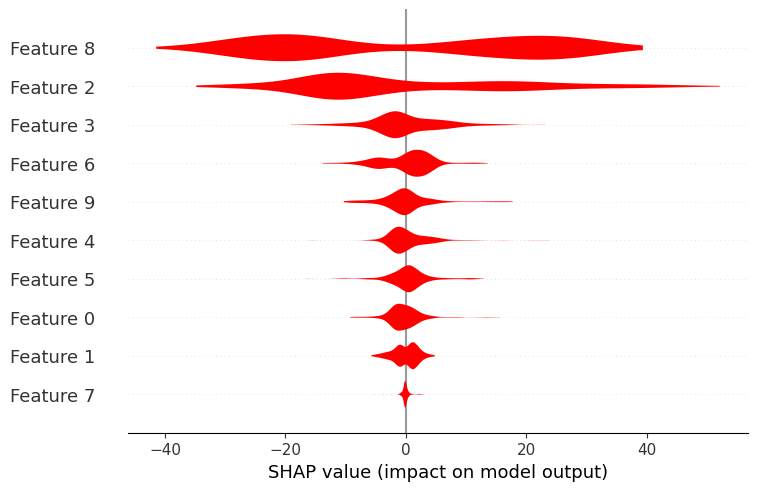

In [8]:
shap.plots.violin(shap_values, color="red")

以列表形式提供特徵名稱有助於視覺化和解釋摘要圖

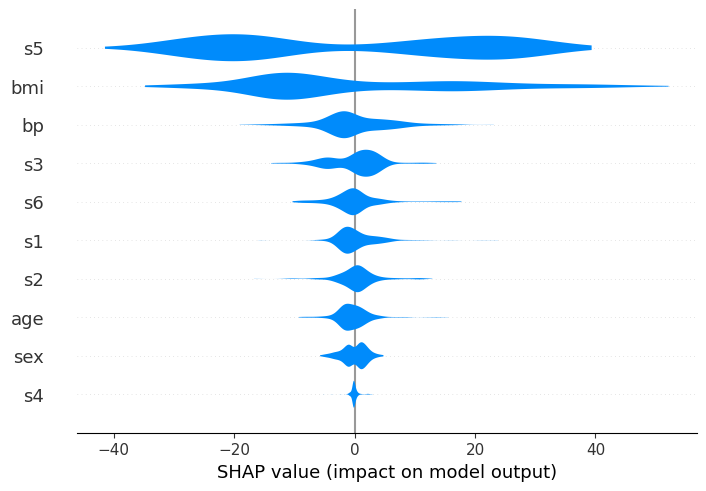

In [9]:
feat_names = list(X.columns)
shap.plots.violin(shap_values, feature_names=feat_names)

# The layered Violin Summary Plot

目前支援兩種小提琴繪圖類型：「violin」和「layered_violin」。可以透過plot_type 參數來控制它。

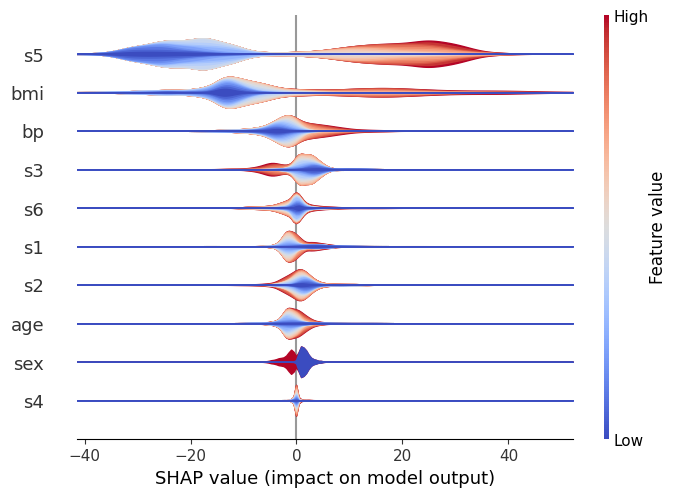

In [10]:
shap.plots.violin(shap_values, features=X, feature_names=feat_names, plot_type="layered_violin")

可以看到，s5是最重要的變量，通常它會導致預測發生較大的正向或負向變化。

紅色代表變數的大值，藍色代表小值，例如 s5 的較大值會增加預測，反之。

# Plot Size

使用plot_size參數，可以控制摘要圖的大小。

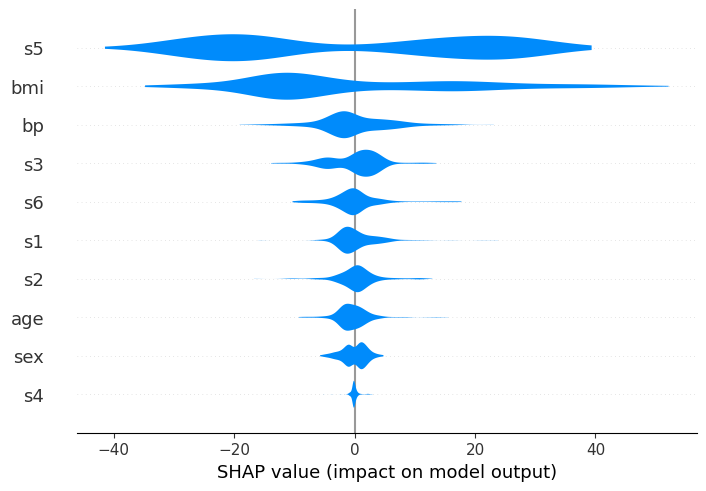

In [12]:
# auto-scaled
shap.plots.violin(shap_values, feature_names=feat_names)

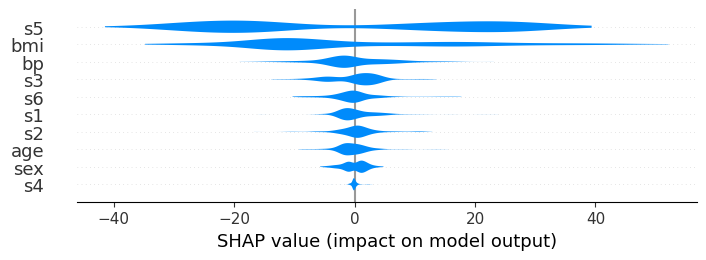

In [13]:
# each plot is 0.1 inches
shap.plots.violin(shap_values, feature_names=feat_names, plot_size=0.1)

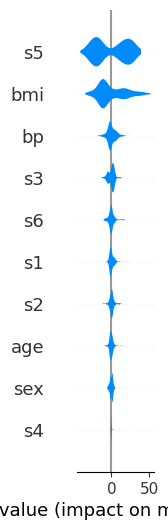

In [15]:
# scale: 1x6 inches
shap.plots.violin(shap_values, feature_names=feat_names, plot_size=(1, 6))

https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/violin.html